## 230968336
## Sameer Raj
## WEEK - 4
## Q-1

# Cats and Dogs Dataset

## Required Imports

In [1]:
from keras.callbacks import History
from keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import DirectoryIterator, ImageDataGenerator

## Preprocessing and Organizing Directories for LeNet-5 (input image size 128x128)

In [2]:
train_datagen_128 = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip = True,
    vertical_flip = True,
    featurewise_std_normalization=True,
    samplewise_std_normalization=True
)
val_datagen_128 = ImageDataGenerator(rescale=1./255)
test_datagen_128 = ImageDataGenerator(rescale=1./255)

C:\Users\samee\anaconda3\envs\tf_env\lib\site-packages\keras\src\legacy\preprocessing\image.py:1063: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn(
C:\Users\samee\anaconda3\envs\tf_env\lib\site-packages\keras\src\legacy\preprocessing\image.py:1072: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn(


In [7]:
base_dir = "cats_and_dogs_filtered"
train_dir = f"{base_dir}/train"
validation_dir = f"{base_dir}/validation"
test_dir = f"{base_dir}/validation"

In [8]:
train_generator_128 = train_datagen_128.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=20,
    class_mode="categorical"  
)

val_generator_128 = val_datagen_128.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=20,
    class_mode="categorical"
)

test_generator_128 = test_datagen_128.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=20,
    class_mode="categorical"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Preprocessing and organizing directories for AlexNet (input image size 227x227)

In [9]:
train_datagen_227 = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip = True,
    vertical_flip = True,
    featurewise_std_normalization=True,
    samplewise_std_normalization=True
)
val_datagen_227 = ImageDataGenerator(rescale=1./255)
test_datagen_227 = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator_227 = train_datagen_227.flow_from_directory(
    train_dir,
    target_size=(227, 227),
    batch_size=20,
    class_mode="categorical"
)

val_generator_227 = val_datagen_227.flow_from_directory(
    validation_dir,
    target_size=(227, 227),
    batch_size=20,
    class_mode="categorical"
)

test_generator_227 = test_datagen_227.flow_from_directory(
    test_dir,
    target_size=(227, 227),
    batch_size=20,
    class_mode="categorical"
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## A) Implementing the following CNN architectures

### 1) LeNet-5

In [11]:
LeNet5_model = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(6, kernel_size=5, padding="same", activation="tanh"),
    MaxPooling2D(pool_size=2, strides=2),
    Conv2D(16, kernel_size=5, activation="tanh"),
    MaxPooling2D(pool_size=2, strides=2),
    Flatten(),
    Dense(120, activation="tanh"),
    Dense(84, activation="tanh"),
    Dense(2, activation="softmax")
])

### 2) AlexNet

In [12]:
AlexNet_model = Sequential([
    Input(shape=(227, 227, 3)),
    Conv2D(96, kernel_size=11, strides=4, activation='relu'),
    MaxPooling2D(pool_size=3, strides=2),
    Conv2D(256, kernel_size=5, padding='same', activation='relu'),
    MaxPooling2D(pool_size=3, strides=2),
    Conv2D(384, kernel_size=3, padding='same', activation='relu'),
    Conv2D(384, kernel_size=3, padding='same', activation='relu'),
    Conv2D(256, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=3, strides=2),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

## Compiling the models

In [13]:
LeNet5_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

AlexNet_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

## Training LeNet-5

In [14]:
epochs = 40

LeNet5_history = LeNet5_model.fit(
    train_generator_128,
    validation_data=val_generator_128,
    epochs=epochs
)

C:\Users\samee\anaconda3\envs\tf_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
C:\Users\samee\anaconda3\envs\tf_env\lib\site-packages\keras\src\legacy\preprocessing\image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\Users\samee\anaconda3\envs\tf_env\lib\site-packages\keras\src\legacy\preprocessing\image.py:1273: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 427ms/step - accuracy: 0.5360 - loss: 0.7466 - val_accuracy: 0.5110 - val_loss: 0.6937
Epoch 2/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - accuracy: 0.5955 - loss: 0.6709 - val_accuracy: 0.5910 - val_loss: 0.6716
Epoch 3/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.5955 - loss: 0.6638 - val_accuracy: 0.5070 - val_loss: 0.7810
Epoch 4/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.6155 - loss: 0.6554 - val_accuracy: 0.5240 - val_loss: 0.7360
Epoch 5/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.5960 - loss: 0.6692 - val_accuracy: 0.5000 - val_loss: 0.7867
Epoch 6/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.5935 - loss: 0.6627 - val_accuracy: 0.5410 - val_loss: 0.6870
Epoch 7/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.6195 - loss: 0.6516 - val_accuracy: 0.5400 - val_loss: 0.7314
Epoch 8/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.6325 - loss: 0.6394 - val_

## Evaluating LeNet-5

In [15]:
lenet5_test_loss, lenet5_test_acc = LeNet5_model.evaluate(test_generator_128)
print(f"LeNet-5 Test accuracy: {lenet5_test_acc:.4f}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5160 - loss: 0.8708
LeNet-5 Test accuracy: 0.5160


Inference : Bad test accuracy due to lack of preprocessing (data augmentation) and usage of primitive model

## Training AlexNet

In [12]:
AlexNet_history = AlexNet_model.fit(
    train_generator_227,
    validation_data=val_generator_227,
    epochs=epochs
)

Epoch 1/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4642 - loss: 1.4590

2025-08-14 11:46:34.458859: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_130_0', 36 bytes spill stores, 36 bytes spill loads

2025-08-14 11:46:34.512638: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_137', 80 bytes spill stores, 80 bytes spill loads

2025-08-14 11:46:34.787139: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_137', 100 bytes spill stores, 100 bytes spill loads

2025-08-14 11:46:34.960651: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_130', 4 bytes spill stores, 4 bytes spill loads

2025-08-14 11:46:35.237602: I external/loc

100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 139ms/step - accuracy: 0.4643 - loss: 1.4533 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 2/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.5109 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 3/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.4917 - loss: 0.6941 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.4970 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.5223 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.5181 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 7/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.5185 - loss: 0.6926 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 8/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.5046 - loss: 0.6932 - val_accuracy: 0.5

## Evaluating AlexNet

In [13]:
alexnet_test_loss, alexnet_test_acc = AlexNet_model.evaluate(test_generator_227)
print(f"AlexNet Test accuracy: {alexnet_test_acc:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4689 - loss: 0.6932
AlexNet Test accuracy: 0.5000


Inference : Bad test accuracy due to lack of preprocessing (data augmentation) and usage of primitive model

## Plotting Accuracy and Loss for Both Models

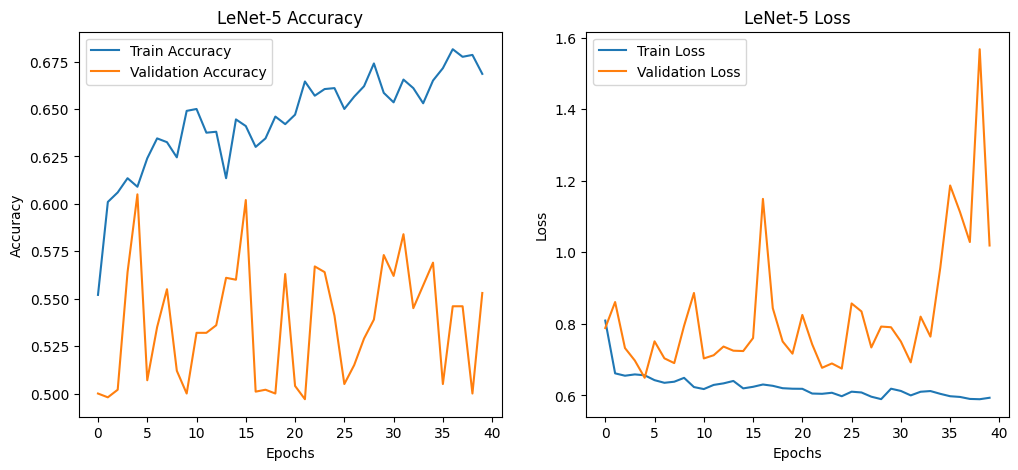

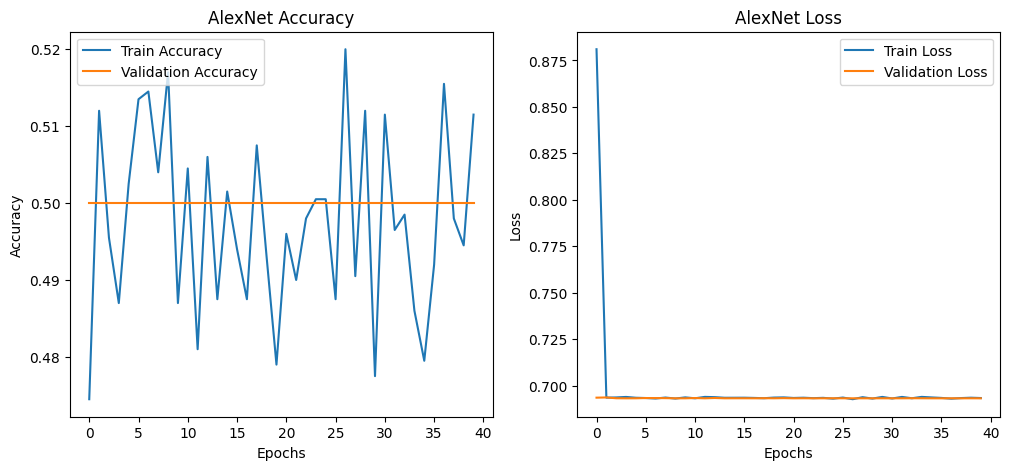

In [15]:
import matplotlib.pyplot as plt
def plot_history(history, model_name):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(LeNet5_history, 'LeNet-5')

plot_history(AlexNet_history, 'AlexNet')

Inference: Lack of clear correlation of accuracy and loss with epochs in most cases

## Getting summary for both models

In [16]:
print("LeNet 5 summary:")
LeNet5_model.summary()
print("AlexNet summary:")
AlexNet_model.summary()

LeNet 5 summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 60, 60, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │     1,728,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,223,980 (19.93 MB)

 Trainable params: 1,741,326 (6.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,482,654 (13.29 MB)

AlexNet summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 174,868,616 (667.07 MB)

 Trainable params: 58,289,538 (222.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 116,579,078 (444.71 MB)

Inference : AlexNet has many more trainable parameters than LeNet-5 due to having more layers and a more complex architecture